<a href="https://colab.research.google.com/github/iamshivamkumarsharma/Frugal-Innovation-in-India-s-Space-Sector-and-Its-Socio-Economic-Impacts/blob/main/Frugal-Innovation-in-India-s-Space-Sector-and-Its-Socio-Economic-Impacts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#drive mount

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd


from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns


# for interactivity
from ipywidgets import interact

from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

Load dataset


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/India Agriculture Crop Production.csv")

In [ ]:
data



,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.0,Hectare,5239.0,Tonnes,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.0,Hectare,5267.0,Tonnes,1.696296
...,...,...,...,...,...,...,...,...,...,...
345402,Manipur,IMPHAL WEST,NaN,2019-20,Rabi,NaN,Hectare,NaN,Tonnes,NaN
345403,Manipur,SENAPATI,NaN,2019-20,Rabi,NaN,Hectare,NaN,Tonnes,NaN
345404,Manipur,TAMENGLONG,NaN,2019-20,Rabi,NaN,Hectare,NaN,Tonnes,NaN
345405,Manipur,THOUBAL,NaN,2019-20,Rabi,NaN,Hectare,NaN,Tonnes,NaN


EDA

In [ ]:
# Display the first few rows
print(data.head())

# Get a summary of the dataset
print(data.info())

# Describe the numerical columns
print(data.describe())

# Check for missing values
print(data.isnull().sum())


                         State                  District      Crop     Year  \
0  Andaman and Nicobar Islands                  NICOBARS  Arecanut  2001-02   
1  Andaman and Nicobar Islands                  NICOBARS  Arecanut  2002-03   
2  Andaman and Nicobar Islands                  NICOBARS  Arecanut  2003-04   
3  Andaman and Nicobar Islands  NORTH AND MIDDLE ANDAMAN  Arecanut  2001-02   
4  Andaman and Nicobar Islands            SOUTH ANDAMANS  Arecanut  2002-03   

       Season    Area Area Units  Production Production Units     Yield  
0      Kharif  1254.0    Hectare      2061.0           Tonnes  1.643541  
1  Whole Year  1258.0    Hectare      2083.0           Tonnes  1.655803  
2  Whole Year  1261.0    Hectare      1525.0           Tonnes  1.209358  
3      Kharif  3100.0    Hectare      5239.0           Tonnes  1.690000  
4  Whole Year  3105.0    Hectare      5267.0           Tonnes  1.696296  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345407 entries, 0 to 345406
Dat

In [ ]:
# Example of handling missing values
data = data.dropna()  # Drop rows with missing values

In [ ]:
data


,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.0,Hectare,5239.0,Tonnes,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.0,Hectare,5267.0,Tonnes,1.696296
...,...,...,...,...,...,...,...,...,...,...
345370,West Bengal,PURBA BARDHAMAN,Wheat,2000-01,Rabi,6310.0,Hectare,15280.0,Tonnes,2.421553
345371,West Bengal,PURULIA,Wheat,1997-98,Rabi,1895.0,Hectare,2760.0,Tonnes,1.456464
345372,West Bengal,PURULIA,Wheat,1998-99,Rabi,3736.0,Hectare,5530.0,Tonnes,1.480193
345373,West Bengal,PURULIA,Wheat,1999-00,Rabi,2752.0,Hectare,6928.0,Tonnes,2.517442


In [ ]:
import pandas as pd

#
unique_states = data['State'].unique()

# Print the unique state names
print("Unique state names:")
for state in unique_states:
    print(state)




Unique state names:
Andaman and Nicobar Islands
Andhra Pradesh
Arunachal Pradesh
Assam
Bihar
Chandigarh
Chhattisgarh
Dadra and Nagar Haveli
Daman and Diu
Delhi
Goa
Gujarat
Haryana
Himachal Pradesh
Jammu and Kashmir
Jharkhand
Karnataka
Kerala
Madhya Pradesh
Maharashtra
Manipur
Meghalaya
Mizoram
Nagaland
Odisha
Puducherry
Punjab
Rajasthan
Sikkim
Tamil Nadu
Tripura
Uttar Pradesh
Uttarakhand
West Bengal
Telangana
Laddakh


In [ ]:
import pandas as pd

# Assuming your data is in a DataFrame called 'data' and there's a column named 'Year'
unique_years = data['Year'].unique()

# Print the unique years
print("Unique years:")
for year in unique_years:
    print(year)


Unique years:
2001-02
2002-03
2003-04
2004-05
2006-07
2005-06
2007-08
2008-09
2009-10
2010-11
2011-12
2012-13
2013-14
2014-15
2015-16
2016-17
2017-18
2018-19
2019-20
2020-21
2000-01
1997-98
1998-99
1999-00


#DiD estimator  ,                                 Chandrayan was launched in 2008, so devide treatment period before 2010 and post treatment period as 2010+.

In [ ]:
num_states = data['State'].nunique()
print(f"Number of states: {num_states}")

Number of states: 36


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/crop_yield.csv")

In [ ]:
df

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909
...,...,...,...,...,...,...,...,...,...,...
19684,Small millets,1998,Kharif,Nagaland,4000.0,2000,1498.0,395200.00,1160.00,0.500000
19685,Wheat,1998,Rabi,Nagaland,1000.0,3000,1498.0,98800.00,290.00,3.000000
19686,Maize,1997,Kharif,Jammu and Kashmir,310883.0,440900,1356.2,29586735.11,96373.73,1.285000
19687,Rice,1997,Kharif,Jammu and Kashmir,275746.0,5488,1356.2,26242746.82,85481.26,0.016667


<Axes: xlabel='Crop_Year', ylabel='Production'>

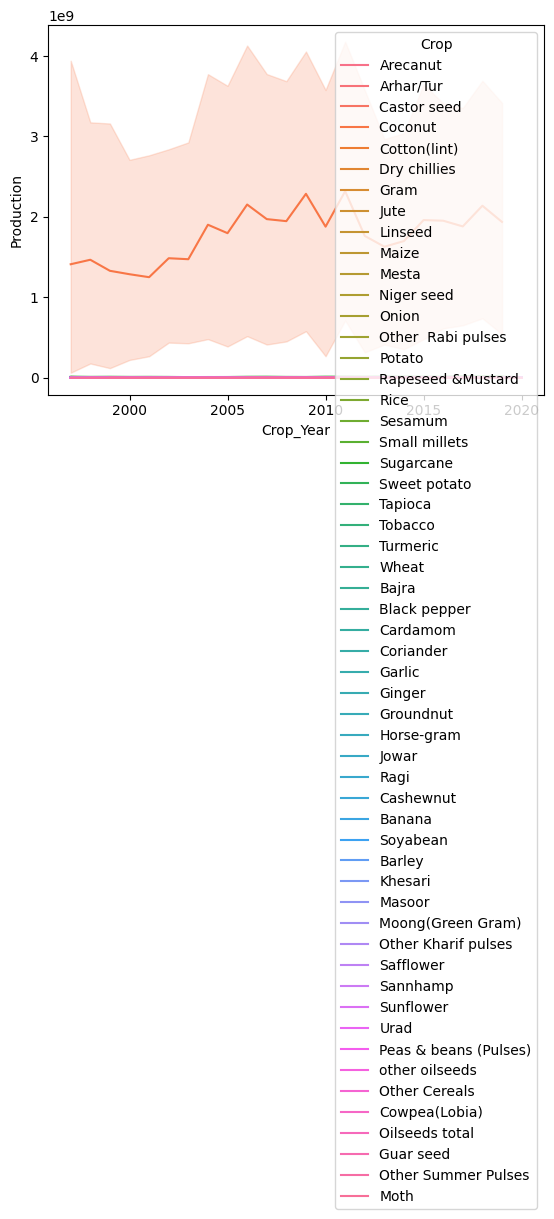

In [ ]:
# @title Crop Production over Time

sns.lineplot(data=df, x="Crop_Year", y="Production", hue="Crop")

**Crop production has been slightly increased due to better weather forcasting, crop planting suggestion time , etc facilities.**

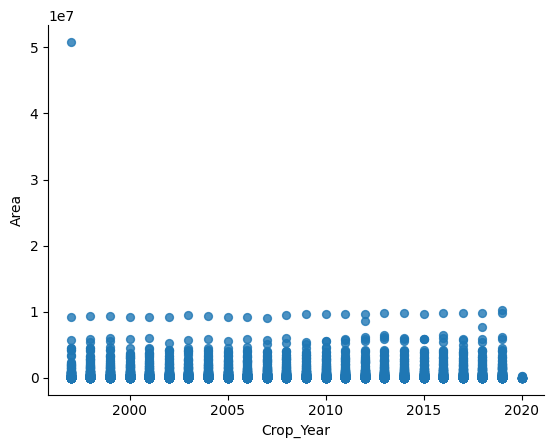

In [ ]:
# @title Crop_Year vs Area

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Crop_Year', y='Area', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='Crop'>

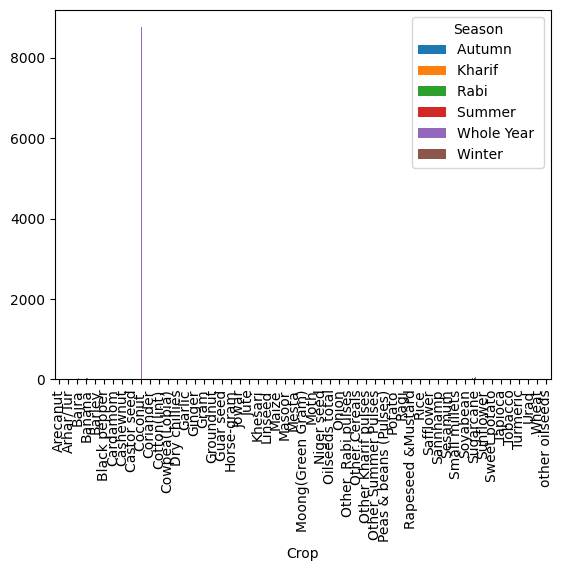

In [ ]:
# @title Average Yield by Crop and Season

df.groupby(['Crop', 'Season'])['Yield'].mean().unstack().plot(kind='bar')

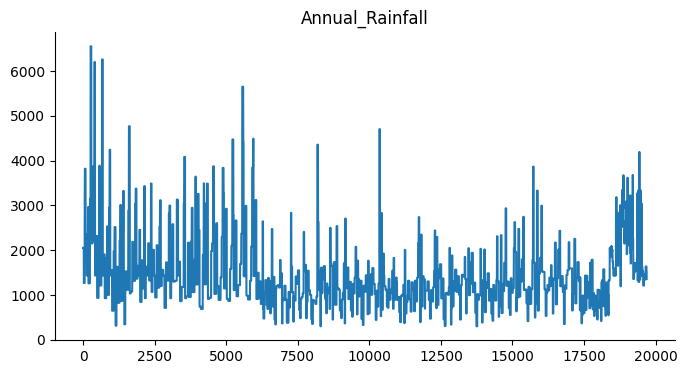

In [ ]:
# @title Annual_Rainfall

from matplotlib import pyplot as plt
df['Annual_Rainfall'].plot(kind='line', figsize=(8, 4), title='Annual_Rainfall')
plt.gca().spines[['top', 'right']].set_visible(False)

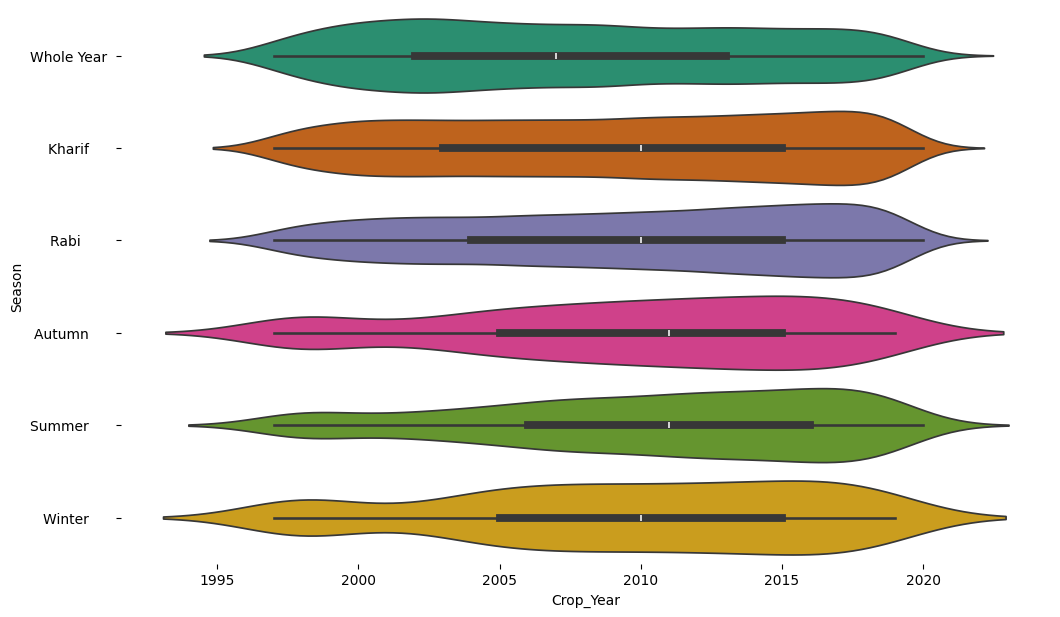

In [ ]:
# @title Season vs Crop_Year

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Season'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Crop_Year', y='Season', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


- **Filter Out the Year 2020**: The code removes all rows where `Crop_Year` is 2020 from the DataFrame `df`.
- **Group by Crop_Year and Sum**: The remaining rows are grouped by the `Crop_Year`, and for each group, it calculates the sum of all numeric columns.
- **Inspect the Result**: It displays the first two rows of the resulting DataFrame to quickly check the sums of the grouped data.

In [ ]:
df_year = df[df['Crop_Year']!=2010]
year_yield = df_year.groupby('Crop_Year').sum()
year_yield.head(5)

,Crop,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
Crop_Year,,,,,,,,,
1997,ArecanutArhar/TurCastor seedCoconut Cotton(lin...,Whole Year Kharif Kharif Whole Year Kh...,AssamAssamAssamAssamAssamAssamAssamAssamAssamA...,1.660686e+08,6087009873,6.542691e+05,1.580475e+10,5.148126e+07,26187.756592
1998,ArecanutBajraBlack pepperCorianderCotton(lint)...,Kharif Kharif Kharif Kharif Su...,PuducherryPuducherryPuducherryPuducherryPuduch...,1.501238e+08,7868086697,1.138474e+06,1.483223e+10,4.353590e+07,36136.246483
1999,ArecanutArhar/TurBananaCastor seedCoconut Cott...,Whole Year Kharif Whole Year Kharif Wh...,AssamAssamAssamAssamAssamAssamAssamAssamAssamA...,1.470574e+08,8550025528,1.033857e+06,1.560720e+10,3.970550e+07,50013.419395
2000,ArecanutArhar/TurArhar/TurBajraBajraBananaCash...,Whole Year Kharif Rabi Kharif Ra...,Andhra PradeshAndhra PradeshAndhra PradeshAndh...,1.475277e+08,9562470060,1.119624e+06,1.448280e+10,3.835721e+07,58342.279827
2001,ArecanutArhar/TurArhar/TurBajraBajraBananaCash...,Whole Year Kharif Rabi Kharif Ra...,Andhra PradeshAndhra PradeshAndhra PradeshAndh...,1.456943e+08,9314563490,1.055077e+06,1.487976e+10,3.788053e+07,56581.195447


In [ ]:
#all states
import pandas as pd

#
unique_states = df['State'].unique()

# Print the unique state names
print("Unique state names:")
for state in unique_states:
    print(state)




Unique state names:
Assam
Karnataka
Kerala
Meghalaya
West Bengal
Puducherry
Goa
Andhra Pradesh
Tamil Nadu
Odisha
Bihar
Gujarat
Madhya Pradesh
Maharashtra
Mizoram
Punjab
Uttar Pradesh
Haryana
Himachal Pradesh
Tripura
Nagaland
Chhattisgarh
Uttarakhand
Jharkhand
Delhi
Manipur
Jammu and Kashmir
Telangana
Arunachal Pradesh
Sikkim


**DiD Estimator**

In [ ]:
treatment_states = ['Punjab', 'Maharashtra', 'Haryana','Gujarat', 'Tamil Nadu']
control_states = ['Bihar', 'Uttar Pradesh', 'West Bengal','Jharkhand' 'Odisha']

df['Treatment'] = df['State'].apply(lambda x: 1 if x in treatment_states else 0)

introduction_year = 2010

df['Post'] = df['Crop_Year'].apply(lambda x: 1 if x >= introduction_year else 0)

df = df.dropna()
df['Yield'] = df['Yield'].astype(float)

import statsmodels.api as sm
import statsmodels.formula.api as smf

# DiD model Formula
formula = 'Yield ~ Treatment * Post + Annual_Rainfall + Fertilizer + Pesticide'

#MODEL FIITING
model = smf.ols(formula, data=df).fit()

# Output the results
print(model.summary())




# Add lagged terms if necessary
df['Yield_Lag'] = df.groupby('State')['Yield'].shift(1)

formula_with_lag = 'Yield ~ Treatment * Post + Yield_Lag + Annual_Rainfall + Fertilizer + Pesticide'

model_with_lag = smf.ols(formula_with_lag, data=df).fit()
print(model_with_lag.summary())

                            OLS Regression Results                            
Dep. Variable:                  Yield   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.641
Date:                Mon, 20 May 2024   Prob (F-statistic):              0.131
Time:                        14:38:13   Log-Likelihood:            -1.6138e+05
No. Observations:               19689   AIC:                         3.228e+05
Df Residuals:                   19682   BIC:                         3.228e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          47.9634     16.383     

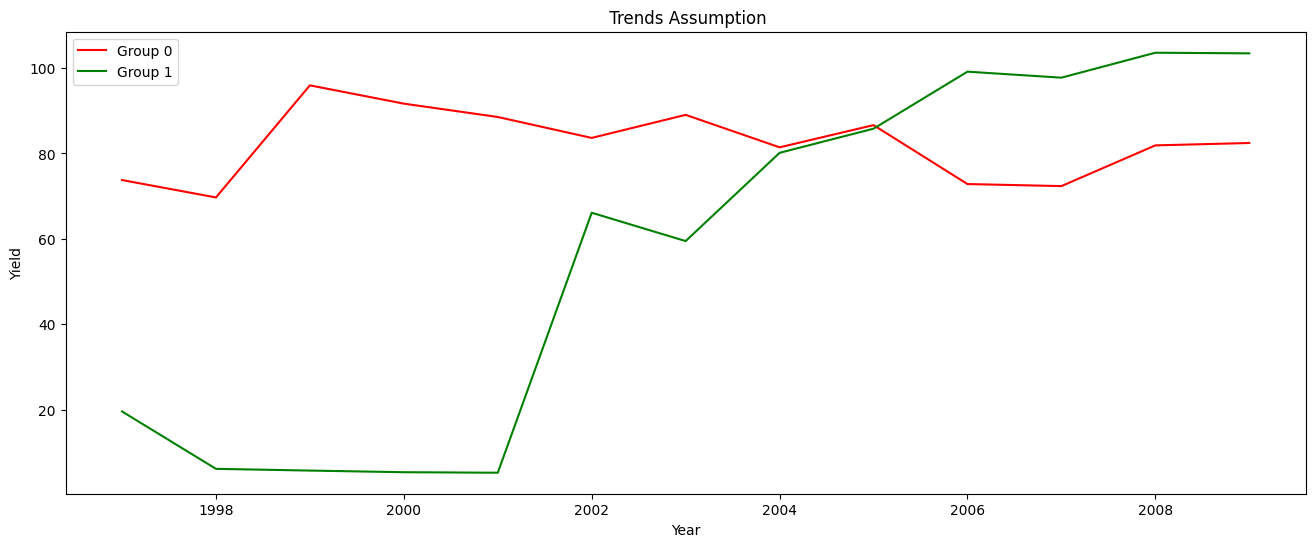

In [ ]:
import matplotlib.pyplot as plt

# Assuming df and introduction_year are already defined

# Filter the pre-treatment data
pre_treatment_data = df[df['Crop_Year'] < introduction_year]

# Create a new figure with a specified size
plt.figure(figsize=(16, 6))


colors = {0: 'red', 1: 'green'}

# Plot the data for each group
for group, group_data in pre_treatment_data.groupby('Treatment'):
    group_data.groupby('Crop_Year')['Yield'].mean().plot(label=f'Group {group}', color=colors[group])

# Add title and labels
plt.title(' Trends Assumption')
plt.xlabel('Year')
plt.ylabel('Yield')

# Add a legend
plt.legend()

# Show the plot
plt.show()


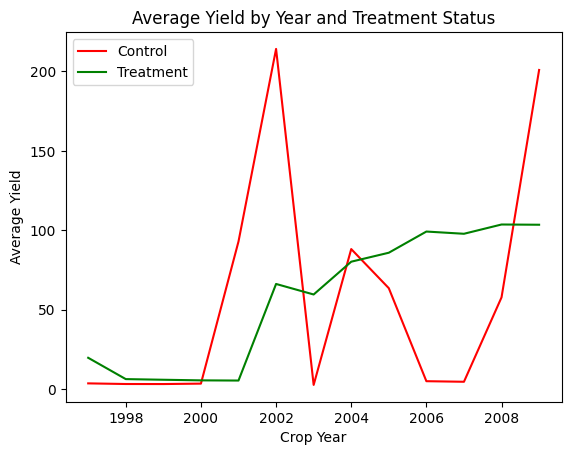

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors

# Assuming df is your DataFrame

# Propensity Score Model
propensity_model = LogisticRegression()

# Select pre-treatment data
pre_treatment_data = df[df['Crop_Year'] < 2010]

# Fit the model
propensity_model.fit(pre_treatment_data[['Annual_Rainfall', 'Fertilizer', 'Pesticide']], pre_treatment_data['Treatment'])

# Calculate Propensity Scores
pre_treatment_data['Propensity_Score'] = propensity_model.predict_proba(pre_treatment_data[['Annual_Rainfall', 'Fertilizer', 'Pesticide']])[:, 1]

# Nearest Neighbors Matching
nn = NearestNeighbors(n_neighbors=1)
treatment_indices = pre_treatment_data[pre_treatment_data['Treatment'] == 1].index
control_indices = pre_treatment_data[pre_treatment_data['Treatment'] == 0].index

# Fit the Nearest Neighbors model on control group
nn.fit(pre_treatment_data.loc[control_indices, ['Propensity_Score']])
distances, indices = nn.kneighbors(pre_treatment_data.loc[treatment_indices, ['Propensity_Score']])

# Get matched control group indices
matched_indices = control_indices[indices.flatten()]

# Combine matched treatment and control groups
matched_data = pd.concat([pre_treatment_data.loc[treatment_indices], pre_treatment_data.loc[matched_indices]])

# Plotting with specified colors
ax = matched_data.groupby(['Crop_Year', 'Treatment'])['Yield'].mean().unstack().plot(
    color=['red', 'green'],  # Specify colors for the control and treatment groups
    title='Average Yield by Year and Treatment Status'
)

# Add labels and legend
ax.set_xlabel('Crop Year')
ax.set_ylabel('Average Yield')
plt.legend(['Control', 'Treatment'])

# Show plot
plt.show()


In [ ]:
import statsmodels.formula.api as smf

formula = 'Yield ~ Treatment * Post + Annual_Rainfall + Fertilizer + Pesticide + C(State) + C(Crop_Year)'

model= smf.ols(formula, data=df).fit()

print(model_fe.summary())


                            OLS Regression Results                            
Dep. Variable:                  Yield   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     5.810
Date:                Mon, 20 May 2024   Prob (F-statistic):           3.13e-39
Time:                        14:51:12   Log-Likelihood:            -1.6123e+05
No. Observations:               19689   AIC:                         3.226e+05
Df Residuals:                   19632   BIC:                         3.230e+05
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     